### Practical 9

###  Performing Simple Linear Regression on Employee_Salary_Data

Problem Statement:
We are given dataset of list of salaries of employees at LMN Co. Ltd.
The HR here has got a candidate with 7 years of experience.
We need to predict the best salary that should be offered to him?

In [3]:
# ----------------------------Step 1 : Importing the libraries ------------------------------
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt


#----------------------------Step 2: Importing the dataset
dataset = pd.read_csv("D:/ML Dataset/Employee_Salary_Data.csv")

#------------------------ Step 3 : Retrieving independent features and dependent variable in X and y-------------
# X: X is the first column which contains Years of Experience.
#y:y is the last column which contains contains salary array.

X = dataset.iloc[:, :-1].values #Independent Variable

y = dataset.iloc[:, -1].values #Dependent Variable

#------------------------ --Step 4: Splitting the dataset into the Training set and Test set------------------------

# So if the whoe dataset contains th 30 observation and test size = 1/3 then
# The split occurs such that 33.33% i.e. 10 approx of all these observations will be in the test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =1/3, random_state = 10)


In [4]:
print(X_train,  y_train, sep=" \n\n")

[[ 6. ]
 [ 4.5]
 [ 5.9]
 [ 3. ]
 [ 4. ]
 [ 8.2]
 [ 8.7]
 [10.3]
 [ 7.9]
 [ 3.9]
 [ 9.5]
 [10.5]
 [ 3.2]
 [ 9. ]
 [ 5.1]
 [ 5.3]
 [ 1.1]
 [ 4.9]
 [ 2.2]
 [ 3.7]] 

[ 93940.  61111.  81363.  60150.  55794. 113812. 109431. 122391. 101302.
  63218. 116969. 121872.  64445. 105582.  66029.  83088.  39343.  67938.
  39891.  57189.]


In [5]:
# ---------------Step 5: Training the Simple Linear Regression model on the Training set -----------------------------

from sklearn.linear_model import LinearRegression

# Now we create an instance (object) of LinearRegression class.
# Naming the object as 'regressor' and simply calling the class constructor LinearRegression().
# No parameters required.

regressor = LinearRegression() #Constructor called for LinearRegression

#Now we have got a Linear Regression model but we have to train it on the training set.
#For this we have to connect it to the training set using fit() function



regressor.fit(X_train, y_train)

LinearRegression()

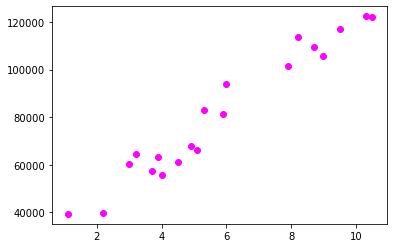

In [6]:
# --------------------------------Step 6: Visualizing the Training set results--------------------------------------------



plt.scatter(X_train, y_train, color = 'magenta')

# REsult: All the points are not in a line but they are in a line-shape. Thus, It;s linear. 
#and can be represented using Linear Regression.


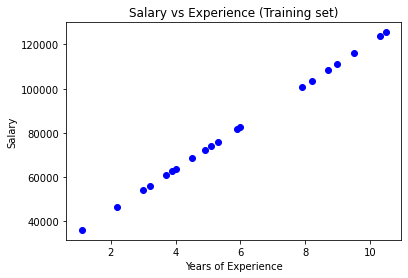

In [7]:
# Plotting the scatter plot of predicted values with X_train.

plt.scatter(X_train, regressor.predict(X_train), color ='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

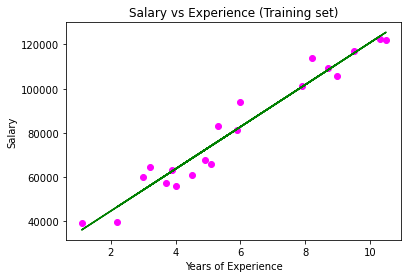

In [8]:
plt.scatter(X_train, y_train, color = 'magenta')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

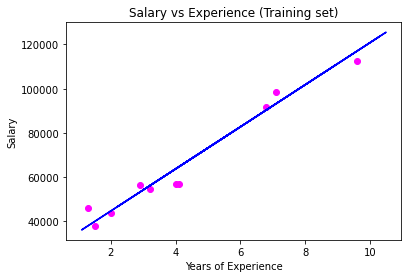

In [9]:
# -------------------------------------Step 7: Visualising the Test set results------------------------------------------

plt.scatter(X_test, y_test, color = 'magenta')


# Note : The regresson line that we get results form a unique equation salary

plt.plot(X_train, regressor.predict(X_train), color ='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [10]:
# Oncomparing two plots, we can see 2 blue lines are the same direction.
# Thus, our model is good to use now.


In [11]:
# Step 8 : Predicting the Test set results for single vector

#Independent varaibles are by default stored in 2-D matrix
# Dependent variables are stored in Series

y_pred1 = regressor.predict([[4]])
print(y_pred1)

y_pred2 = regressor.predict([[7]])
print(y_pred2)

[63688.60413598]
[92232.17464658]


In [12]:
# Step 9 :Predicting the Test set results for Array X_test

# We can also pass an array of X instead of single value of X.

# The observations of the test set are six in number.
#Now we wish to predict salaries for each of these observations.


y_pred3 = regressor.predict(X_test)
print(y_pred3)

[ 90329.26994588  56076.98533315  53222.62828209  39902.29537714
  44659.55712891  93183.62699694  64640.05648633 116969.93575577
  63688.60413598  37999.39067643]


In [13]:
# Step 10
# Getting the final linear REgression equation with the values of the coefficients

# y m.x+c or y = B0 + B1.x
print(regressor.coef_)    # slope or m or B1
print(regressor.intercept_) # y-intercept when x value or year_exp = 0 or c or B0

[9514.52350354]
25630.51012183784


In [14]:
# ------------------------------Step 11 : Forming equation of Linear Regression

#Therefore, the equation of our simple linear regression model is:

#    y = m.x + c

#    y(i.e. Salary) = regressor.coef_.x(i.e. Years of Experience) + regressor.intercept_

#    Salary = 9345.94 x YearsExperience +26816.19

In [15]:
# Model Evaluation

print('R squared: {:.2f}'.format(regressor.score(X,y)*100))

R squared: 95.69


In [16]:
print(regressor.score(X_test,y_test)*100,"%")

96.02319713033926 %


In [17]:
# Interpreting accuracy:

# 1. R Squared: R Square is the coefficient of determination.
# It tells us how many points fall on the regression line.
# The value of R Square is 95.65, which indicates that 95.65% of the data fit the regression model

In [18]:
# The difference between regression and classification is that :
# Regression is used when we need to predict a continous real value like a salary or Grades
# Classification is used when we need to predict a category or a class.
